## 1. Import Libraries
This block imports essential libraries for data manipulation (pandas, numpy), sentiment analysis (TextBlob), statistical correlation (scipy.stats), and visualization (matplotlib, seaborn).

In [1]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load News and Stock Data
Loads the processed news sentiment data and Apple's historical stock data from CSV files. Handles file errors and ensures the required files are present.

In [2]:
try:
    # Load the news csv file
    news_df = pd.read_csv('../../data/processed_analyst_ratings.csv')
    # Load Historical Data
    stock_df = pd.read_csv('../../data/yfinance_data/AAPL_historical_data.csv')
except FileNotFoundError:
    print("File not found. Please ensure the path is correct and the file exists.")
    exit(1)
except Exception as e:
    print(f"An error occurred while reading the parquet file: {e}")
    exit(1)

## 3. Convert Date Columns to Datetime
Converts the date columns in both DataFrames to datetime format for accurate merging and time-based analysis.

In [3]:
news_df['date'] = pd.to_datetime(news_df['date'], format='mixed', utc=True)
stock_df['Date'] = pd.to_datetime(stock_df['Date'], format='mixed', utc=True)

## 4. Merge News and Stock Data
Merges the news and stock DataFrames on the date columns to align sentiment scores with corresponding stock prices.

In [36]:
merged_df = pd.merge(news_df[news_df['stock'] == 'AAPL'], 
                     stock_df, left_on='date', right_on='Date', how='left')

## 5. Inspect Merged Data
Displays the shape and a sample of the merged DataFrame to verify the merge and inspect the data.

In [28]:
print(merged_df.shape)
print(merged_df['date'].nunique())
merged_df.head(15)

(405, 15)
59


,headline,url,publisher,date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,101 Stocks Moving In Monday's Mid-Day Session,https://www.benzinga.com/news/20/03/15508983/1...,Lisa Levin,2020-03-09 00:00:00+00:00,AAPL,0.000000,2020-03-09 00:00:00+00:00,65.937500,69.522499,65.750000,66.542503,64.736046,286744800,0.0,0.0
1,Investor Movement Index Summary: February 2020,https://www.benzinga.com/news/earnings/20/03/1...,TD Ameritrade,2020-03-09 00:00:00+00:00,AAPL,0.000000,2020-03-09 00:00:00+00:00,65.937500,69.522499,65.750000,66.542503,64.736046,286744800,0.0,0.0
2,Crude Awakening: Energy Sector Takes A 20% Spi...,https://www.benzinga.com/news/earnings/20/03/1...,JJ Kinahan,2020-03-09 00:00:00+00:00,AAPL,-0.466667,2020-03-09 00:00:00+00:00,65.937500,69.522499,65.750000,66.542503,64.736046,286744800,0.0,0.0
3,Morning Market Stats In 5 Minutes,https://www.benzinga.com/news/20/03/15517906/m...,Benzinga Newsdesk,2020-03-10 00:00:00+00:00,AAPL,0.000000,2020-03-10 00:00:00+00:00,69.285004,71.610001,67.342499,71.334999,69.398438,285290000,0.0,0.0
4,123 Biggest Movers From Yesterday,https://www.benzinga.com/news/20/03/15514298/1...,Lisa Levin,2020-03-10 00:00:00+00:00,AAPL,0.000000,2020-03-10 00:00:00+00:00,69.285004,71.610001,67.342499,71.334999,69.398438,285290000,0.0,0.0
5,"UBS Maintains Buy on Apple, Lowers Price Targe...",https://www.benzinga.com/news/20/03/15514989/u...,Vick Meyer,2020-03-10 00:00:00+00:00,AAPL,0.000000,2020-03-10 00:00:00+00:00,69.285004,71.610001,67.342499,71.334999,69.398438,285290000,0.0,0.0
6,Shares of several technology companies are tra...,https://www.benzinga.com/wiim/20/03/15515009/s...,luke@benzinga.com,2020-03-10 00:00:00+00:00,AAPL,0.097000,2020-03-10 00:00:00+00:00,69.285004,71.610001,67.342499,71.334999,69.398438,285290000,0.0,0.0
7,"Airlines Continue Suffering As Delta, American...",https://www.benzinga.com/news/earnings/20/03/1...,JJ Kinahan,2020-03-10 00:00:00+00:00,AAPL,-0.350000,2020-03-10 00:00:00+00:00,69.285004,71.610001,67.342499,71.334999,69.398438,285290000,0.0,0.0
8,Jedi Wars Between Amazon And Microsoft Are Sti...,https://www.benzinga.com/government/20/03/1551...,IAM Newswire,2020-03-10 00:00:00+00:00,AAPL,0.260000,2020-03-10 00:00:00+00:00,69.285004,71.610001,67.342499,71.334999,69.398438,285290000,0.0,0.0
9,The Main Challenges Faced By The Upcoming EV Era,https://www.benzinga.com/news/20/03/15517355/t...,IAM Newswire,2020-03-10 00:00:00+00:00,AAPL,0.166667,2020-03-10 00:00:00+00:00,69.285004,71.610001,67.342499,71.334999,69.398438,285290000,0.0,0.0


## 6. Handle Missing Values
Checks for missing values in the merged DataFrame, drops any rows with missing data, and displays the new shape.

In [29]:
# Check for missing values
print(merged_df['date'].isnull().sum())
merged_df.dropna(inplace=True)  # Drop missing values if necessary
merged_df.shape

0


(405, 15)

## 7. Calculate Daily Returns
Calculates the daily stock return as the percentage change in the closing price and adds it as a new column.

In [30]:
merged_df['daily_return'] = merged_df['Close'].pct_change()  # Calculate daily returns
merged_df.head()

,headline,url,publisher,date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return
0,101 Stocks Moving In Monday's Mid-Day Session,https://www.benzinga.com/news/20/03/15508983/1...,Lisa Levin,2020-03-09 00:00:00+00:00,AAPL,0.000000,2020-03-09 00:00:00+00:00,65.937500,69.522499,65.750000,66.542503,64.736046,286744800,0.0,0.0,NaN
1,Investor Movement Index Summary: February 2020,https://www.benzinga.com/news/earnings/20/03/1...,TD Ameritrade,2020-03-09 00:00:00+00:00,AAPL,0.000000,2020-03-09 00:00:00+00:00,65.937500,69.522499,65.750000,66.542503,64.736046,286744800,0.0,0.0,0.000000
2,Crude Awakening: Energy Sector Takes A 20% Spi...,https://www.benzinga.com/news/earnings/20/03/1...,JJ Kinahan,2020-03-09 00:00:00+00:00,AAPL,-0.466667,2020-03-09 00:00:00+00:00,65.937500,69.522499,65.750000,66.542503,64.736046,286744800,0.0,0.0,0.000000
3,Morning Market Stats In 5 Minutes,https://www.benzinga.com/news/20/03/15517906/m...,Benzinga Newsdesk,2020-03-10 00:00:00+00:00,AAPL,0.000000,2020-03-10 00:00:00+00:00,69.285004,71.610001,67.342499,71.334999,69.398438,285290000,0.0,0.0,0.072022
4,123 Biggest Movers From Yesterday,https://www.benzinga.com/news/20/03/15514298/1...,Lisa Levin,2020-03-10 00:00:00+00:00,AAPL,0.000000,2020-03-10 00:00:00+00:00,69.285004,71.610001,67.342499,71.334999,69.398438,285290000,0.0,0.0,0.000000


## 8. Pearson Correlation Calculation
Drops rows with missing sentiment or daily return values, then calculates and prints the Pearson correlation coefficient and p-value to assess linear correlation.

In [31]:
# Drop missing values before correlation calculation
valid_data = merged_df.dropna(subset=['sentiment', 'daily_return'])

# Pearson correlation (linear relationship)
pearson_corr, pearson_p = pearsonr(valid_data['sentiment'], valid_data['daily_return'])
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p}")


Pearson correlation: -0.08891187322190987, p-value: 0.0742441099376037


## 9. Spearman Correlation Calculation
Calculates and prints the Spearman rank correlation coefficient and p-value to assess monotonic relationships.

In [32]:
# Spearman correlation (monotonic relationship, non-parametric)
spearman_corr, spearman_p = spearmanr(valid_data['sentiment'], valid_data['daily_return'])
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p}")


Spearman correlation: -0.06538741020751751, p-value: 0.18965431185103396


## 10. Kendall Correlation Calculation
Calculates and prints the Kendall tau correlation coefficient and p-value to assess ordinal associations.

In [33]:
# Kendall correlation (ordinal association, non-parametric)
kendall_corr, kendall_p = kendalltau(valid_data['sentiment'], valid_data['daily_return'])
print(f"Kendall correlation: {kendall_corr}, p-value: {kendall_p}")

Kendall correlation: -0.0570177131648947, p-value: 0.18644066168805873


The results show the following correlation values between news sentiment and daily stock return for AAPL:

- **Pearson correlation:** -0.0889 (p-value: 0.07424)
- **Spearman correlation:** -0.06538 (p-value: 0.18965)
- **Kendall correlation:** -0.05701 (p-value: 0.18644)

**Interpretation:**

All three correlation coefficients are extremely close to zero, indicating almost no relationship between news sentiment and daily stock return in the dataset.
The p-values are much greater than 0.05, so these correlations are not statistically significant.

## 11. Scatter Plot of Sentiment vs. Daily Return
Creates a scatter plot to visualize the relationship between news sentiment scores and daily stock returns.

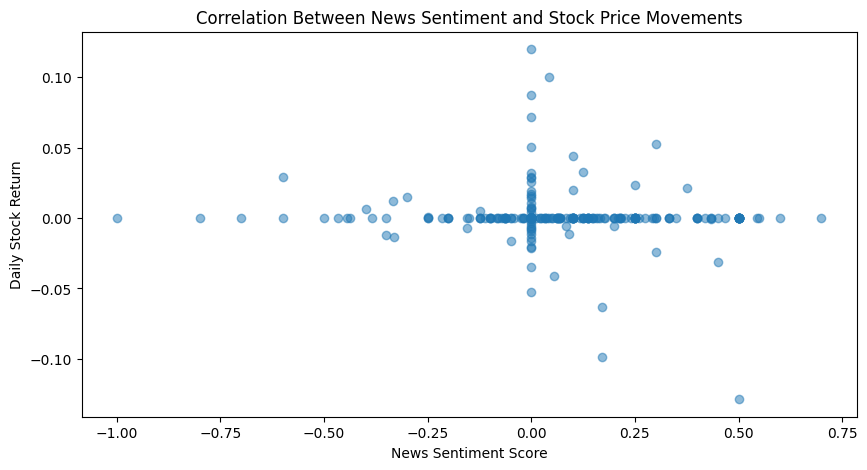

In [34]:
plt.figure(figsize=(10,5))
plt.scatter(valid_data['sentiment'], valid_data['daily_return'], alpha=0.5)
plt.xlabel('News Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.title('Correlation Between News Sentiment and Stock Price Movements')
plt.show()

## 12. Correlation Heatmap
Selects relevant numeric columns, computes the correlation matrix, and visualizes it as a heatmap to show the strength and direction of relationships between variables.

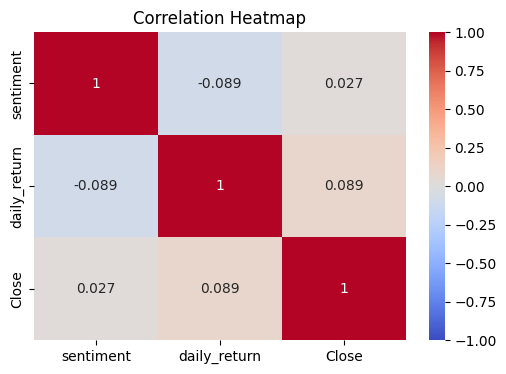

In [35]:
# Select relevant numeric columns for correlation
corr_data = valid_data[['sentiment', 'daily_return', 'Close']]

# Compute correlation matrix
corr_matrix = corr_data.corr(method='pearson')  # You can use 'spearman' or 'kendall' as well

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()